In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_25059/119940986.py:20: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  t = linkage(z, method = "single")


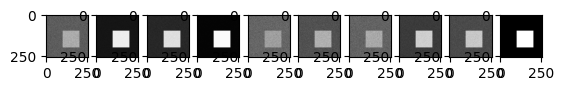

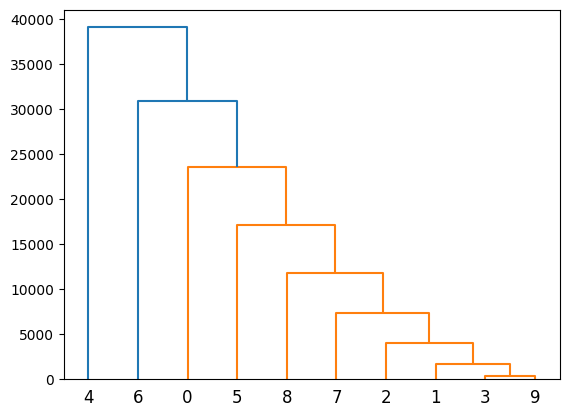

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_25059/119940986.py:26: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  tav = linkage(z, method = "average")


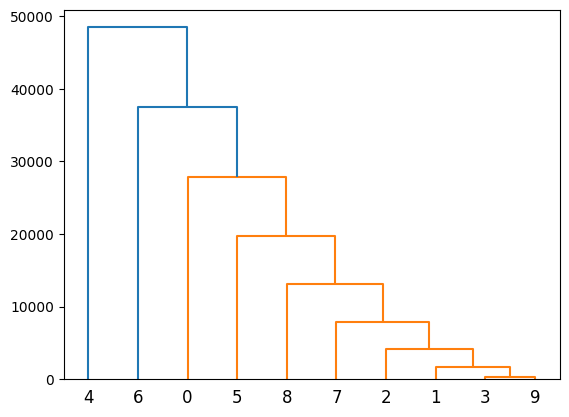

In [2]:
# create images with different noise levels
dim = 256
image = np.zeros((dim, dim), dtype =np.float32)
image[:,:]=20
image[99:199,99:199] = 200
N = 10
x = np.zeros((N, dim, dim), dtype = np.float32)
noise = np.random.permutation(N)**2

fig, ax = plt.subplots(1, 10)
for i in range(N):
    x[i,:,:] = image + noise[i]*np.random.randn(dim,dim)
    ax[i].imshow(x[i,:,:], cmap="gray")
    
xd = x.reshape(N, dim*dim)
d = pdist(xd)
z = squareform(d)

# single linkage
t = linkage(z, method = "single")
fig, ax = plt.subplots()
dendrogram(t)
plt.show()

# average linkage
tav = linkage(z, method = "average")
fig, ax = plt.subplots()
dendrogram(tav)
plt.show()